# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.
填写并提交此已完成的工作表（包括其输出和工作表外的任何支持代码）以及您的作业提交。有关更多详细信息，请参阅课程网站上的作业页面。
我们已经看到，通过在输入图像的像素上训练线性分类器，我们可以在图像分类任务上实现合理的性能。在本练习中，我们将展示，我们可以通过训练线性分类器来提高分类性能，不是在原始像素上，而是在从原始像素计算出的特征上。
你在这个练习中的所有工作都将在这个笔记本上完成。

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for your own interest.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

## 提取特征

对于每幅图像，我们将计算一个方向直方图

使用HSV中的色调通道的梯度（HOG）和颜色直方图

色空间。我们通过连接形成每个图像的最终特征向量

HOG和颜色直方图特征向量。


粗略地说，HOG应该捕捉图像的纹理，同时忽略

颜色直方图表示输入的颜色

图像，而忽略纹理。因此，我们希望将两者结合使用

应该比单独使用两者效果更好。验证这一假设将

为自己的利益而努力是件好事。


“hog_feature”和“color_histogram_hsv”函数都在单个

并返回该图像的特征向量。extract_features

函数获取一组图像和一系列特征函数，并计算

每个图像上的每个特征函数，将结果存储在矩阵中，其中

每一列都是单个特征向量的连接

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [4]:
print(X_train_feats.shape,X_val_feats.shape,X_test_feats.shape)

(49000, 155) (1000, 155) (1000, 155)


## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.
使用任务中早期开发的多类SVM代码，在上述提取的特征之上训练SVM；这应该比直接在原始像素上训练SVM获得更好的结果。

In [5]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

lrList=[5e-3,1e-2,2e-2,5e-2,1e-1]
regList=[5e-5,1e-4,2e-4,5e-4,1e-3]
numList=[1000]
batchList=[200]
best_val=0
best_data=None
for tlr in lrList:
    for treg in regList:
        for tnum in numList:
            for tbatNum in batchList:
                tSVM=LinearSVM()
                tSVM.train(X_train_feats,y_train,tlr,treg,tnum,tbatNum)
                p_train=tSVM.predict(X_train_feats)
                p_val=tSVM.predict(X_val_feats)
                tacc=(p_train==y_train).sum()/y_train.shape[0]
                vacc=(p_val==y_val).sum()/y_val.shape[0]
                results[(tlr,treg)]=(tacc,vacc)
                if vacc>best_val:
                    best_val=vacc
                    best_svm=tSVM
                    best_data=(tlr,treg)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))

print(best_data)
print('best validation accuracy achieved: %f' % best_val)

lr 5.000000e-03 reg 5.000000e-05 train accuracy: 0.509735 val accuracy: 0.484000
lr 5.000000e-03 reg 1.000000e-04 train accuracy: 0.507898 val accuracy: 0.491000
lr 5.000000e-03 reg 2.000000e-04 train accuracy: 0.508959 val accuracy: 0.490000
lr 5.000000e-03 reg 5.000000e-04 train accuracy: 0.509857 val accuracy: 0.505000
lr 5.000000e-03 reg 1.000000e-03 train accuracy: 0.509857 val accuracy: 0.495000
lr 1.000000e-02 reg 5.000000e-05 train accuracy: 0.510061 val accuracy: 0.500000
lr 1.000000e-02 reg 1.000000e-04 train accuracy: 0.510653 val accuracy: 0.495000
lr 1.000000e-02 reg 2.000000e-04 train accuracy: 0.508755 val accuracy: 0.487000
lr 1.000000e-02 reg 5.000000e-04 train accuracy: 0.511612 val accuracy: 0.502000
lr 1.000000e-02 reg 1.000000e-03 train accuracy: 0.509857 val accuracy: 0.494000
lr 2.000000e-02 reg 5.000000e-05 train accuracy: 0.509469 val accuracy: 0.494000
lr 2.000000e-02 reg 1.000000e-04 train accuracy: 0.507898 val accuracy: 0.491000
lr 2.000000e-02 reg 2.000000

In [6]:
# Evaluate your trained SVM on the test set: you should be able to get at least 0.40
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.495


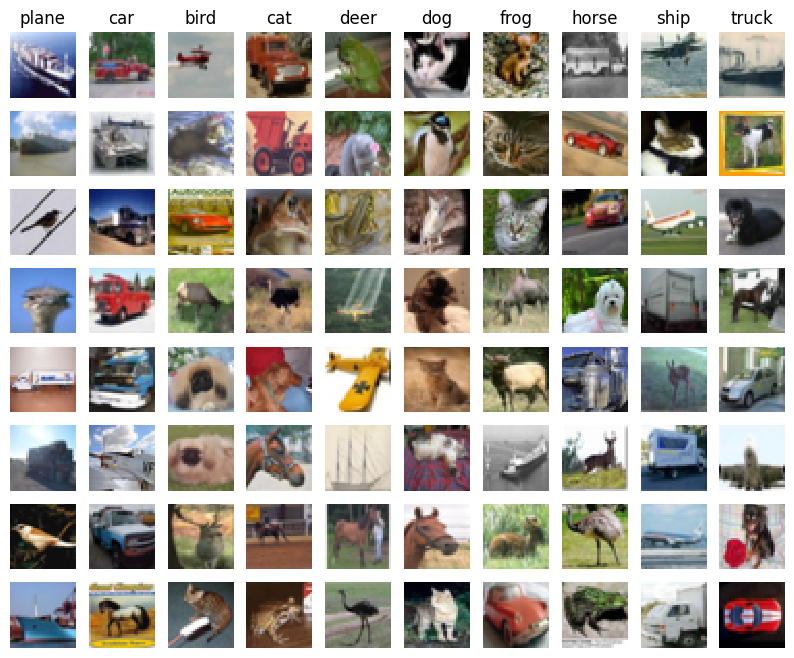

In [7]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?


$\color{blue}{\textit Your Answer:}$




## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels.

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [8]:
# Preprocessing: Remove the bias dimension
# Make sure to run this cell only ONCE
print(X_train_feats.shape)
X_train_feats = X_train_feats[:, :-1]
X_val_feats = X_val_feats[:, :-1]
X_test_feats = X_test_feats[:, :-1]

print(X_train_feats.shape)

(49000, 155)
(49000, 154)


In [33]:
from cs231n.classifiers.fc_net import TwoLayerNet
from cs231n.solver import Solver

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

data = {
    'X_train': X_train_feats,
    'y_train': y_train,
    'X_val': X_val_feats,
    'y_val': y_val,
    'X_test': X_test_feats,
    'y_test': y_test,
}

best_Score=0
best_net = None
best_info=None
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
lrList=[1e-1]
regList=[1e-3,1e-2,1e-1]
for lr in lrList:
    for reg in regList:
        tnet = TwoLayerNet(input_dim, hidden_dim, num_classes,reg)
        tsovler=Solver(tnet,data,num_epochs=40,optim_config={"learning_rates":lr},print_every=100,verbose=True)
        tsovler.train()
        tscore=tsovler.val_acc_history[-1]
        print(lr,reg,)
        if tscore>best_Score:
            best_Score=tscore
            best_net=tnet
            best_info=(lr,reg)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


(Iteration 1 / 19600) loss: 2.302607
(Epoch 0 / 40) train acc: 0.113000; val_acc: 0.107000
(Iteration 101 / 19600) loss: 2.301997
(Iteration 201 / 19600) loss: 2.301589
(Iteration 301 / 19600) loss: 2.301820
(Iteration 401 / 19600) loss: 2.300020
(Epoch 1 / 40) train acc: 0.248000; val_acc: 0.256000
(Iteration 501 / 19600) loss: 2.300524
(Iteration 601 / 19600) loss: 2.297350
(Iteration 701 / 19600) loss: 2.292280
(Iteration 801 / 19600) loss: 2.284093
(Iteration 901 / 19600) loss: 2.262182
(Epoch 2 / 40) train acc: 0.275000; val_acc: 0.274000
(Iteration 1001 / 19600) loss: 2.225289
(Iteration 1101 / 19600) loss: 2.199090
(Iteration 1201 / 19600) loss: 2.140733
(Iteration 1301 / 19600) loss: 2.044364
(Iteration 1401 / 19600) loss: 2.007496
(Epoch 3 / 40) train acc: 0.279000; val_acc: 0.291000
(Iteration 1501 / 19600) loss: 1.873603
(Iteration 1601 / 19600) loss: 1.939034
(Iteration 1701 / 19600) loss: 1.858611
(Iteration 1801 / 19600) loss: 1.780051
(Iteration 1901 / 19600) loss: 1.712

In [34]:
print(best_Score)

0.584


In [35]:
# Run your best neural net classifier on the test set. You should be able
# to get more than 55% accuracy.
print(best_info)
y_test_pred = np.argmax(best_net.loss(data['X_test']), axis=1)
test_acc = (y_test_pred == data['y_test']).mean()
print(test_acc)

(0.1, 0.01)
0.569
